In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

In [18]:
df = pd.read_hdf('data-p1/agg_polls_by_day.h5')
df

,state,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,adjpoll_clinton,adjpoll_trump,samplesizeadj,day,c_minus_t_raw,c_minus_t_adj
0,Maryland,ABC News/Washington Post,A+,706.0,lv,63.0,27.0,62.70862,28.73903,706.0,2016-09-27,36.0,33.96959
0,Maryland,ABC News/Washington Post,A+,706.0,lv,63.0,27.0,62.70862,28.73903,706.0,2016-09-28,36.0,33.96959
0,Maryland,ABC News/Washington Post,A+,706.0,lv,63.0,27.0,62.70862,28.73903,706.0,2016-09-29,36.0,33.96959
0,Maryland,ABC News/Washington Post,A+,706.0,lv,63.0,27.0,62.70862,28.73903,706.0,2016-09-30,36.0,33.96959
0,Maryland,ABC News/Washington Post,A+,752.0,rv,63.0,28.0,60.84333,30.40937,752.0,2016-03-30,35.0,30.43396
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,U.S.,icitizen,NaN,1000.0,rv,42.0,37.0,45.81087,42.71049,1000.0,2016-09-15,5.0,3.10038
1,U.S.,icitizen,NaN,1000.0,rv,42.0,37.0,45.81087,42.71049,1000.0,2016-09-16,5.0,3.10038
1,U.S.,icitizen,NaN,1000.0,rv,42.0,37.0,45.81087,42.71049,1000.0,2016-09-17,5.0,3.10038
1,U.S.,icitizen,NaN,1000.0,rv,42.0,37.0,45.81087,42.71049,1000.0,2016-09-18,5.0,3.10038


In [12]:
dff = df[df["state"] == 'U.S']


def weighted_average(group, value_column):
    sqrt_sample_sizes = group['samplesizeadj'] ** 0.5
    median_sqrt_sample_size = group['samplesizeadj'].median() ** 0.5
    weights = sqrt_sample_sizes / median_sqrt_sample_size
    return (group[value_column] * weights).sum() / weights.sum()



df_agg = dff.groupby(['day', 'population']).apply(
    lambda group: pd.Series({
        'c_minus_t_raw': weighted_average(group, 'c_minus_t_raw'),
        'c_minus_t_adj': weighted_average(group, 'c_minus_t_adj')
    })
).reset_index()

# Reset the index to make 'day' a regular column again
df_agg = df_agg.reset_index()

# df_agg = df_agg.rename(columns={df_agg.columns[-1]:'c_minus_t_raw'})

# Display the new aggregated DataFrame
print("Aggregated DataFrame (df_agg):")
print(df_agg)

Aggregated DataFrame (df_agg):
     index        day population  c_minus_t_raw  c_minus_t_adj
0        0 2015-11-06         rv       7.000000       6.514660
1        1 2015-11-07         rv       7.000000       6.514660
2        2 2015-11-07          v      -5.000000      -5.031770
3        3 2015-11-08         rv       7.000000       6.514660
4        4 2015-11-08          v      -5.000000      -5.031770
..     ...        ...        ...            ...            ...
899    899 2016-11-05         lv       1.155342       0.771230
900    900 2016-11-05         rv       1.754245       2.263163
901    901 2016-11-06         lv       1.308000       0.888132
902    902 2016-11-06         rv       1.754245       2.263163
903    903 2016-11-07         lv       1.396024       0.993121

[904 rows x 5 columns]


C:\Users\mairi\AppData\Local\Temp\ipykernel_10704\244336915.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_agg = df.groupby(['day', 'population']).apply(


In [15]:
target = df_agg[df_agg['day']>=pd.to_datetime('2016-08-01')]
target = target[target['population'] == 'lv']
# target['delta'] = target['c_minus_t_raw'] - target.shift(1)['c-minus-t']

target


,index,day,population,c_minus_t_raw,c_minus_t_adj
672,672,2016-08-01,lv,1.817287,-0.756722
675,675,2016-08-02,lv,1.306970,-1.176749
678,678,2016-08-03,lv,1.358966,-1.162256
681,681,2016-08-04,lv,2.079809,-0.461964
683,683,2016-08-05,lv,2.686043,0.238399
...,...,...,...,...,...
895,895,2016-11-03,lv,0.985615,0.600803
897,897,2016-11-04,lv,1.225782,0.880607
899,899,2016-11-05,lv,1.155342,0.771230
901,901,2016-11-06,lv,1.308000,0.888132


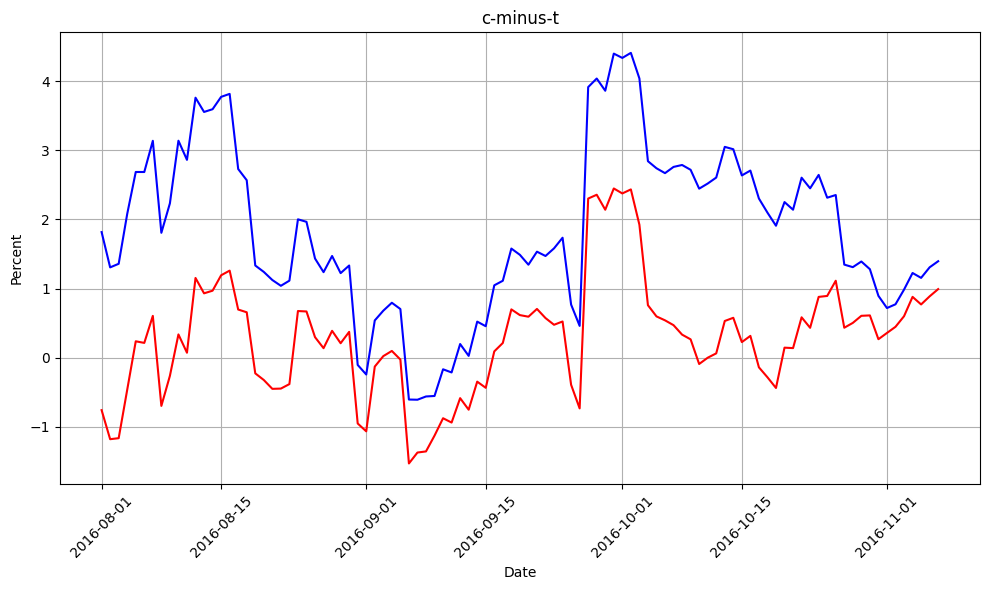

In [16]:
# Plot 'c-minus-t' by day
plt.figure(figsize=(10, 6))
# plt.plot(target['day'], target['c-minus-t'], marker=None, linestyle='-', color='b')
plt.plot(target['day'], target['c_minus_t_raw'], marker=None, linestyle='-', color='b')
plt.plot(target['day'], target['c_minus_t_adj'], marker=None, linestyle='-', color='r')
#plt.plot(target['day'], target['delta'], marker=None, linestyle='-', color='r')



# Add labels and title
plt.xlabel('Date')
plt.ylabel('Percent')
plt.title('c-minus-t')
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
percentile = target['c-minus-t'].quantile([0.1,0.9]) # to show more entries

# Get rows where 'column_name' exceeds the 95th percentile
worst_clinton = target[target['c-minus-t'] <= percentile[0.1]]

worst_clinton

KeyError: 'c-minus-t'

In [45]:
best_clinton = target[target['c-minus-t'] >= percentile[0.9]]
best_clinton

,day,population,c-minus-t,delta
802,2016-09-28,lv,2.935580,0.068880
806,2016-09-30,lv,3.278033,0.416356
808,2016-10-01,lv,3.207561,-0.070472
810,2016-10-02,lv,3.322758,0.115197
813,2016-10-03,lv,2.919941,-0.402817
842,2016-10-13,lv,2.951806,0.405197
845,2016-10-14,lv,2.974145,0.022339


In [46]:
percentile_delta = target['delta'].quantile([0.1,0.9])

# Get rows where 'column_name' exceeds the 95th percentile
worst_clinton_delta = target[target['delta'] <= percentile_delta[0.1]]

worst_clinton_delta

,day,population,c-minus-t,delta
755,2016-09-06,lv,-0.813047,-1.039837
796,2016-09-25,lv,0.186380,-0.793975
813,2016-10-03,lv,2.919941,-0.402817
816,2016-10-04,lv,2.395921,-0.524020
847,2016-10-15,lv,2.630972,-0.343173
852,2016-10-17,lv,2.296332,-0.395724
880,2016-10-27,lv,1.663507,-0.464145


In [47]:
best_clinton_delta = target[target['delta'] >= percentile_delta[0.9]]
best_clinton_delta

,day,population,c-minus-t,delta
747,2016-09-02,lv,-0.050294,0.437741
772,2016-09-14,lv,-0.162278,0.379547
778,2016-09-16,lv,0.292973,0.498831
782,2016-09-18,lv,0.736053,0.401280
800,2016-09-27,lv,2.866699,2.910209
806,2016-09-30,lv,3.278033,0.416356
842,2016-10-13,lv,2.951806,0.405197
